### Machine Learning I - Fase 1

Nome: **Marcel Luís dos Santos Albuquerque**

### Análise Exploratória e Preparação dos Dados


Nesta fase, você se apropriará dos dados, conhecendo o dataset. Será nesta fase que você fará a etapa de Exploratory Data Analysis, EDA, que consiste em uma análise exploratória dos dados. A partir das técnicas de EDA você descobrirá as características dos dados quanto ao tipo, atributos, escala, frequência, distribuição, dados faltantes etc.

Faz parte dessa etapa também a preparação dos dados, isso inclui a limpeza dos dados, correção, reescala e transformação, bem como a seleção dos atributos mais relevantes para a tarefa de classificação a ser explorada na fase 2.


#### 1) Formatação dos atributos


Antes de analisar os atributos, precisamos unificar o formato de representação de cada coluna.

Verifique quais colunas estão com mais de uma representação de seu valor e formate para que todos os valores fiquem na mesma representação.

Ex: A coluna “temperature” precisa ser formatada para que todos os valores representem a temperatura em um formato único.

Por fim, você deve transformar todas as colunas para o formato numérico.

**OBS:** Lembre-se que colunas nominais e ordinais possuem formas diferentes de serem transformadas em numéricas.


In [ ]:
# Insira seu código aqui.
# Você pode criar células de código adicionais


# TODO
# 1) Visualização dos dados de cada coluna
# 2) Identificação das colunas que precisa ter seus dados unificados
# 3) Formatação de cada coluna coletada
# 4) Transformação das colunas no formato numérico

##### Importando as bibliotecas essenciais e carregando o base de dados

In [1]:
# Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Carregando dataset
df = pd.read_csv('../data/raw/AtlanticForestInvertFloInteractionData_2022-07.csv')

##### Visão geral da base de dados

Objetivo: entender as variáveis, tipos e primeiras inconsistências.

In [2]:
# Analisando as primeiras linhas
df.head(5)

,municipality,state,country,veg_landuse_type_point_level1,veg_landuse_type_point_level2,veg_landuse_type_buffer5km_level1,veg_landuse_type_buffer5km_level2,temperature,temperature_num,temperature_range,...,invertebrate_genera,invertebrate_species_complete_name,invertebrate_origins,invertebrate_behavior,invertebrate_collector_structure,number_interactions,number_of_this_plant_interactions_onsite,number_of_this_invertebrate_interactions_onsite,plant_collected_material,invertebrate_collected
0,Alfenas,Minas Gerais,Brazil,forest,semideciduous,"agriculture, pasture","coffee, annual crops",NaN,NaN,NaN,...,Partamona,Partamona cupira,native,floral visitor,NaN,2.0,2.0,5.0,NaN,whole body
1,Alfenas,Minas Gerais,Brazil,forest,semideciduous,"agriculture, pasture","coffee, annual crops",NaN,NaN,NaN,...,Melipona,Melipona quadrifasciata,native,floral visitor,NaN,1.0,1.0,2.0,NaN,whole body
2,Alfenas,Minas Gerais,Brazil,forest,semideciduous,"agriculture, pasture","coffee, annual crops",NaN,NaN,NaN,...,Augochlora,Augochlora sp.,native,floral visitor,NaN,5.0,5.0,1.0,NaN,whole body
3,Alfenas,Minas Gerais,Brazil,forest,semideciduous,"agriculture, pasture","coffee, annual crops",NaN,NaN,NaN,...,NaN,Syrphidae sp,native,floral visitor,NaN,7.0,7.0,1.0,NaN,whole body
4,Alfenas,Minas Gerais,Brazil,forest,semideciduous,"agriculture, pasture","coffee, annual crops",NaN,NaN,NaN,...,Partamona,Partamona cupira,native,floral visitor,NaN,1.0,1.0,6.0,NaN,whole body


In [3]:
# Analisando as últimas linhas
df.tail(5)

,municipality,state,country,veg_landuse_type_point_level1,veg_landuse_type_point_level2,veg_landuse_type_buffer5km_level1,veg_landuse_type_buffer5km_level2,temperature,temperature_num,temperature_range,...,invertebrate_genera,invertebrate_species_complete_name,invertebrate_origins,invertebrate_behavior,invertebrate_collector_structure,number_interactions,number_of_this_plant_interactions_onsite,number_of_this_invertebrate_interactions_onsite,plant_collected_material,invertebrate_collected
18417,Ubatuba,Sao Paulo,Brazil,restinga,NaN,forest,NaN,NaN,NaN,NaN,...,Solenopsis,Solenopsis sp.,native,flower mite predator,NaN,4.0,331.0,4.0,flowers and leaves,whole body
18418,Ubatuba,Sao Paulo,Brazil,restinga,NaN,forest,NaN,NaN,NaN,NaN,...,Dorymyrmex,Dorymyrmex sp.,native,foraging for nectar,NaN,3.0,331.0,3.0,flowers and leaves,whole body
18419,Ubatuba,Sao Paulo,Brazil,restinga,NaN,forest,NaN,NaN,NaN,NaN,...,Azteca,Azteca sp.,native,foraging for nectar,NaN,3.0,331.0,3.0,flowers and leaves,whole body
18420,Ubatuba,Sao Paulo,Brazil,restinga,NaN,forest,NaN,NaN,NaN,NaN,...,Bombus,Bombus (Fervidobombus) morio,native,effective pollinator,corbicula,1.0,NaN,NaN,flowers and leaves,whole body
18421,Ubatuba,Sao Paulo,Brazil,restinga,NaN,forest,NaN,NaN,NaN,NaN,...,Proctolaelaps,Proctolaelaps sp.,native,robber,NaN,1.0,NaN,NaN,flowers and leaves,whole body


In [4]:
# Informações gerais
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18422 entries, 0 to 18421
Data columns (total 31 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   municipality                                     18422 non-null  object 
 1   state                                            18422 non-null  object 
 2   country                                          18422 non-null  object 
 3   veg_landuse_type_point_level1                    17769 non-null  object 
 4   veg_landuse_type_point_level2                    9278 non-null   object 
 5   veg_landuse_type_buffer5km_level1                15396 non-null  object 
 6   veg_landuse_type_buffer5km_level2                4326 non-null   object 
 7   temperature                                      5829 non-null   object 
 8   temperature_num                                  5829 non-null   float64
 9   temperature_range           

In [5]:
# Estatísticas descritivas incluindo dados categóricos
df.describe(include='all')

,municipality,state,country,veg_landuse_type_point_level1,veg_landuse_type_point_level2,veg_landuse_type_buffer5km_level1,veg_landuse_type_buffer5km_level2,temperature,temperature_num,temperature_range,...,invertebrate_genera,invertebrate_species_complete_name,invertebrate_origins,invertebrate_behavior,invertebrate_collector_structure,number_interactions,number_of_this_plant_interactions_onsite,number_of_this_invertebrate_interactions_onsite,plant_collected_material,invertebrate_collected
count,18422,18422,18422,17769,9278,15396,4326,5829,5829.000000,5829.000000,...,15889,18384,13134,15356,9394,17186.000000,9326.000000,9187.000000,14684,16101
unique,187,19,3,28,43,58,20,300,NaN,NaN,...,626,2542,2,36,25,NaN,NaN,NaN,25,7
top,Antonina,Sao Paulo,Brazil,forest,early,forest,sugarcane,20.00-30.00,NaN,NaN,...,Apis,Apis mellifera,native,touched reproductive structures,corbicula,NaN,NaN,NaN,flowers and branches,whole body
freq,2252,6512,17985,8087,1813,7135,1598,2780,NaN,NaN,...,2091,2082,11094,5245,3056,NaN,NaN,NaN,9927,15216
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.364061,7.184217,...,NaN,NaN,NaN,NaN,NaN,10.002677,147.683144,46.998476,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.583772,4.914814,...,NaN,NaN,NaN,NaN,NaN,61.570269,439.225349,147.048603,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,1.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,1.000000,4.000000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.000000,10.000000,...,NaN,NaN,NaN,NaN,NaN,1.000000,17.000000,4.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.000000,10.000000,...,NaN,NaN,NaN,NaN,NaN,1.000000,50.000000,16.000000,NaN,NaN


##### Verificando valores nulos

In [6]:
# Analisando colunas que possuem valores nulos
df.isnull().sum().sort_values(ascending=False)

relative_humidity                                  16593
veg_landuse_type_buffer5km_level2                  14096
temperature                                        12593
temperature_range                                  12593
temperature_num                                    12593
number_of_this_invertebrate_interactions_onsite     9235
veg_landuse_type_point_level2                       9144
number_of_this_plant_interactions_onsite            9096
invertebrate_collector_structure                    9028
plant_flower_shape                                  5998
invertebrate_origins                                5288
plant_flower_colour                                 4374
plant_habit                                         3870
plant_collected_material                            3738
plant_type                                          3588
invertebrate_behavior                               3066
veg_landuse_type_buffer5km_level1                   3026
invertebrate_genera            

In [7]:
# Porcentagem de valores ausentes
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False)

relative_humidity                                  90.071653
veg_landuse_type_buffer5km_level2                  76.517208
temperature                                        68.358484
temperature_range                                  68.358484
temperature_num                                    68.358484
number_of_this_invertebrate_interactions_onsite    50.130279
veg_landuse_type_point_level2                      49.636304
number_of_this_plant_interactions_onsite           49.375746
invertebrate_collector_structure                   49.006623
plant_flower_shape                                 32.558897
invertebrate_origins                               28.704809
plant_flower_colour                                23.743350
plant_habit                                        21.007491
plant_collected_material                           20.290956
plant_type                                         19.476713
invertebrate_behavior                              16.643144
veg_landuse_type_buffer5

##### 1.1) Visualização dos dados de cada coluna
Objetivo: visualizar a distribuição e comportamento das variáveis.

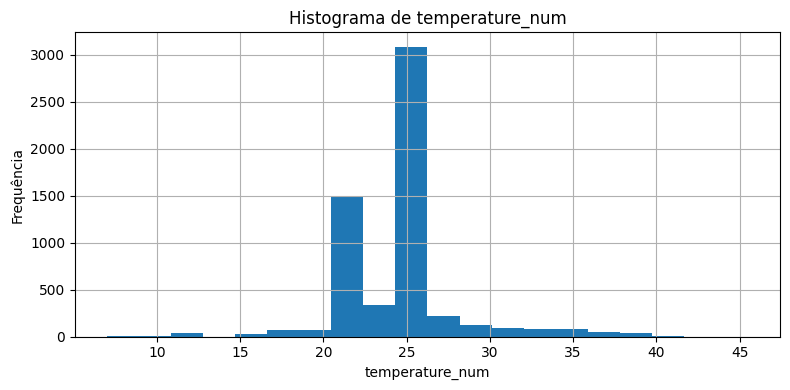

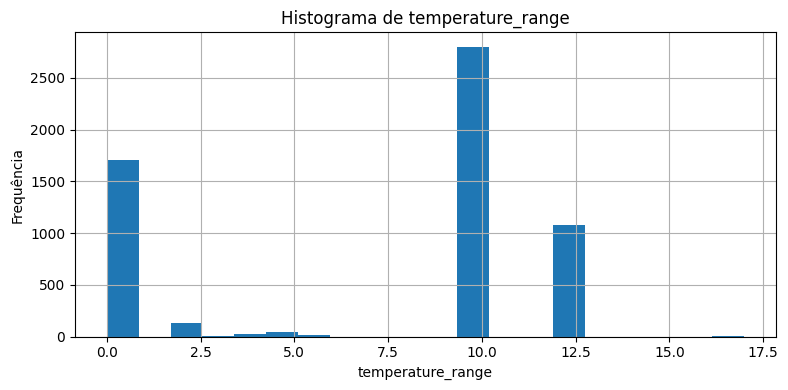

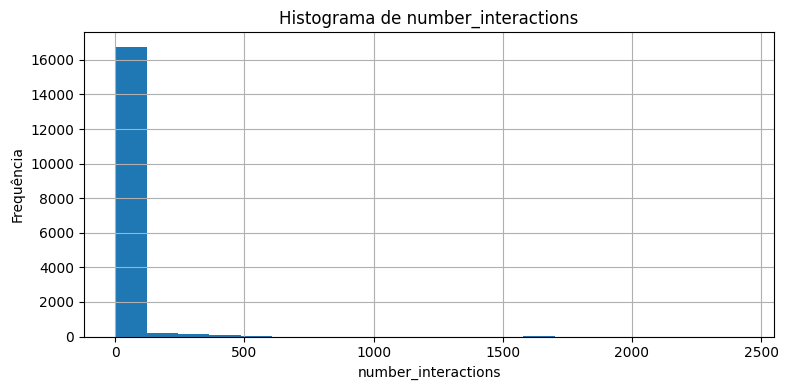

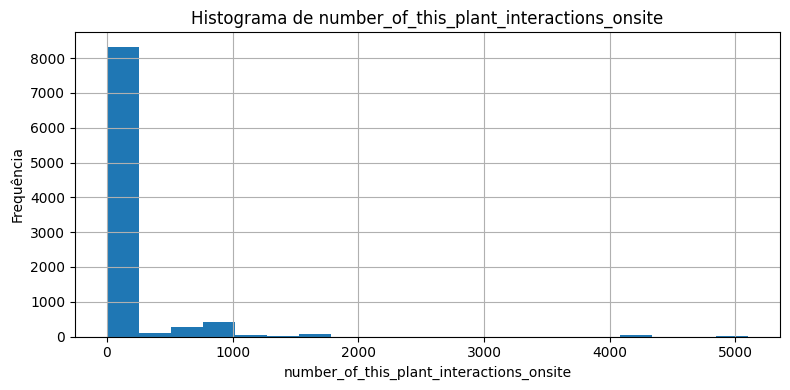

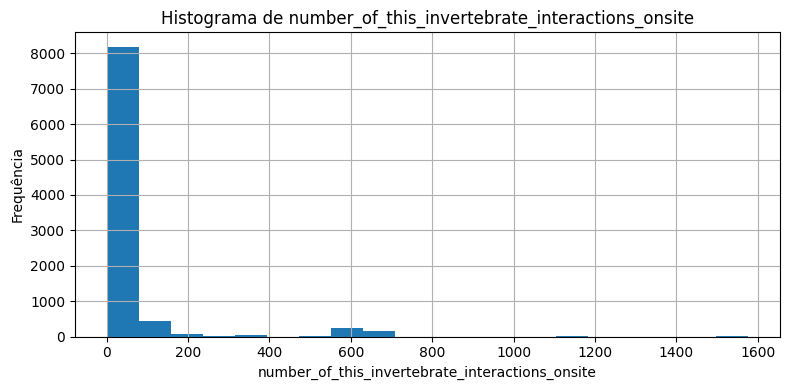

In [8]:
# Histograma para colunas numéricas
colunas_numericas = df.select_dtypes(include=['int64', 'float64']).columns

for coluna in colunas_numericas:
    plt.figure(figsize=(8, 4))
    df[coluna].hist(bins=20)
    plt.title(f'Histograma de {coluna}')
    plt.xlabel(coluna)
    plt.ylabel('Frequência')
    plt.tight_layout()
    plt.show()


municipality: 187 categorias


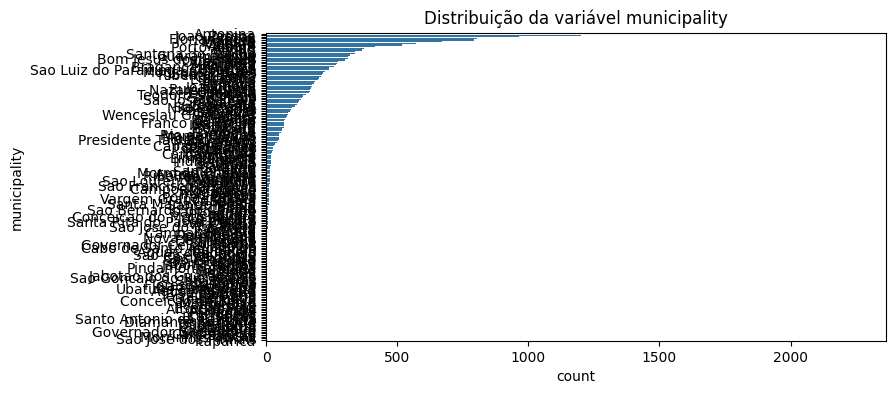

state: 19 categorias


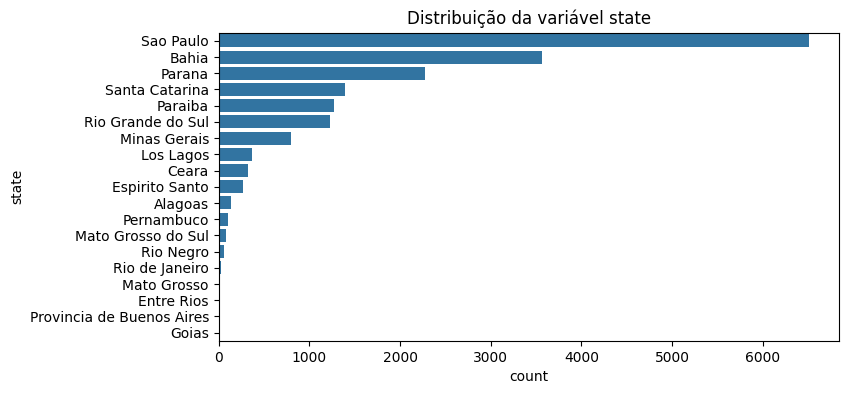

country: 3 categorias


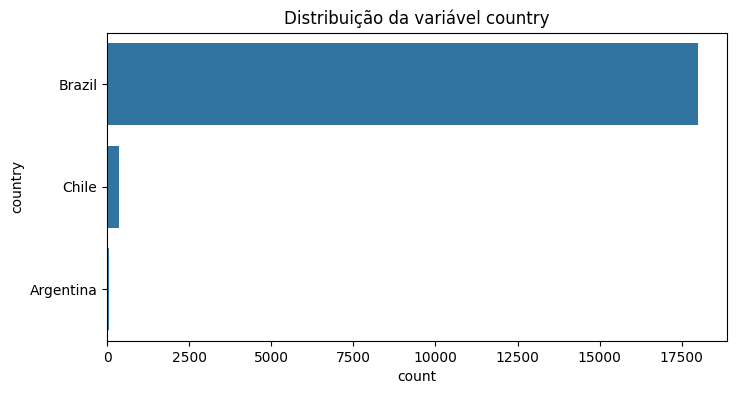

veg_landuse_type_point_level1: 28 categorias


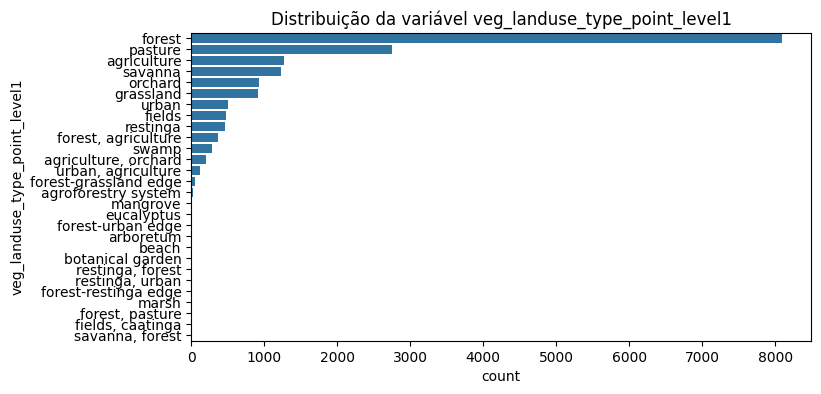

veg_landuse_type_point_level2: 43 categorias


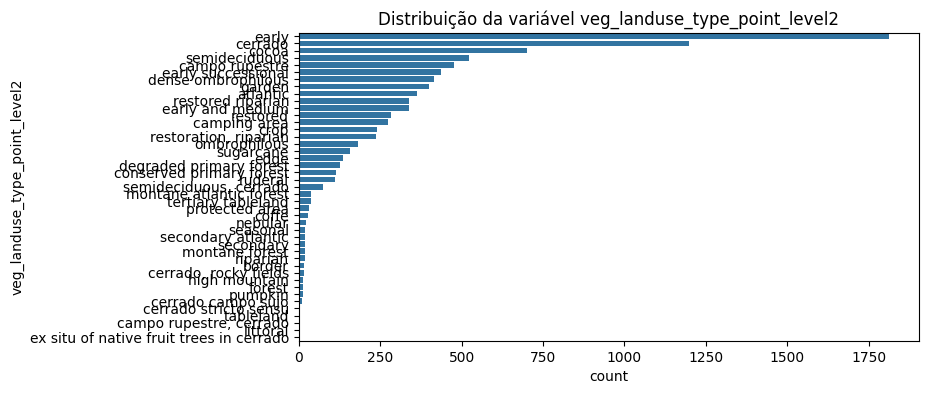

veg_landuse_type_buffer5km_level1: 58 categorias


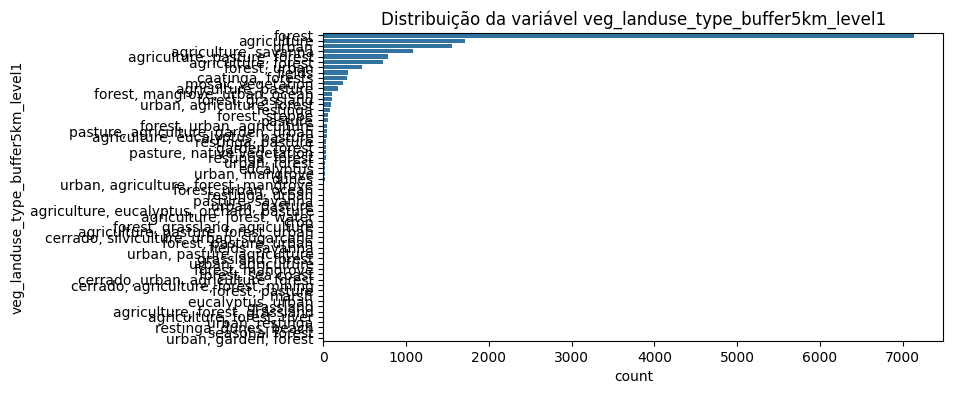

veg_landuse_type_buffer5km_level2: 20 categorias


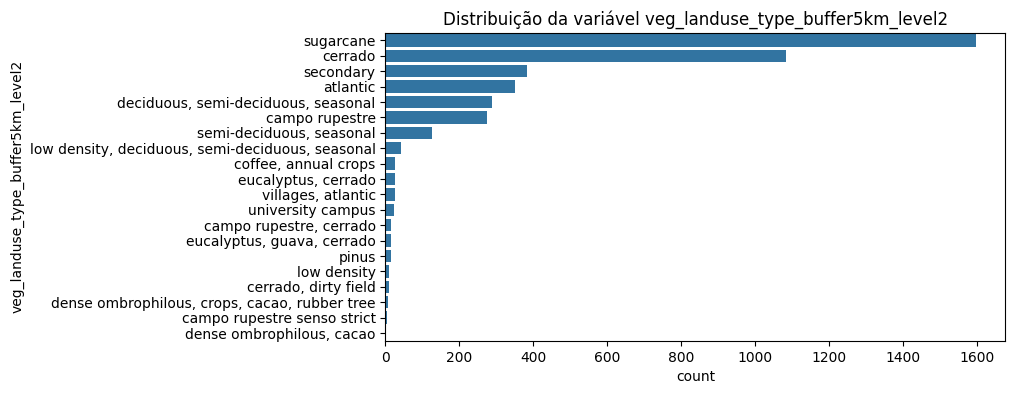

temperature: 300 categorias


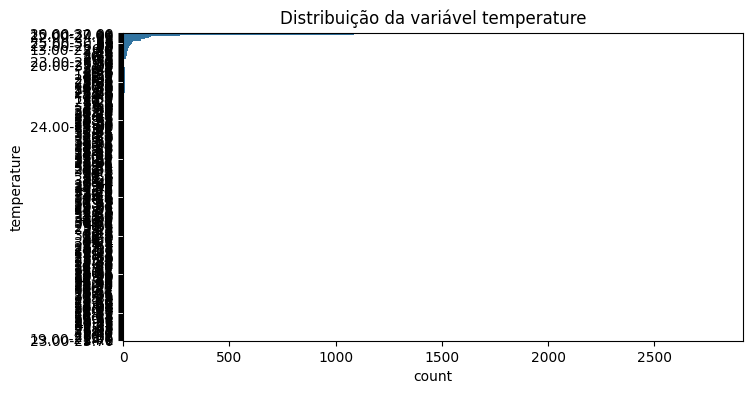

relative_humidity: 140 categorias


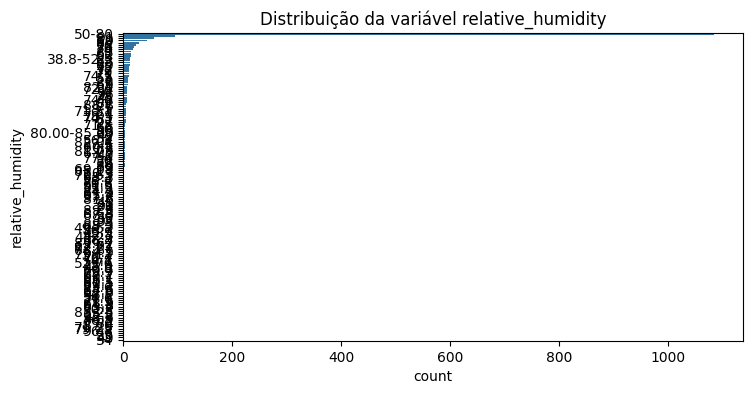

plant_order: 40 categorias


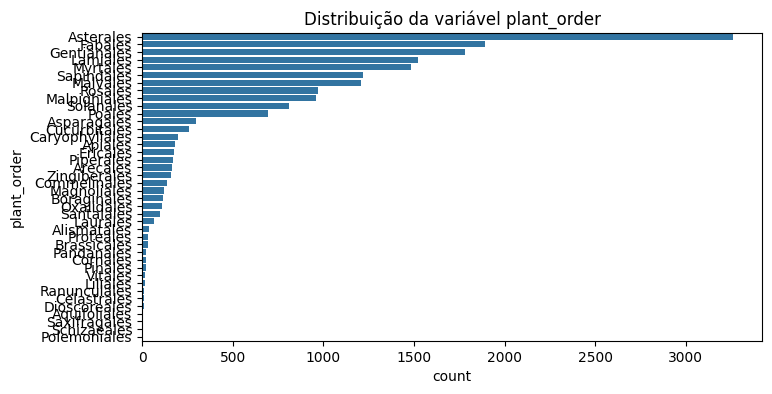

plant_family: 141 categorias


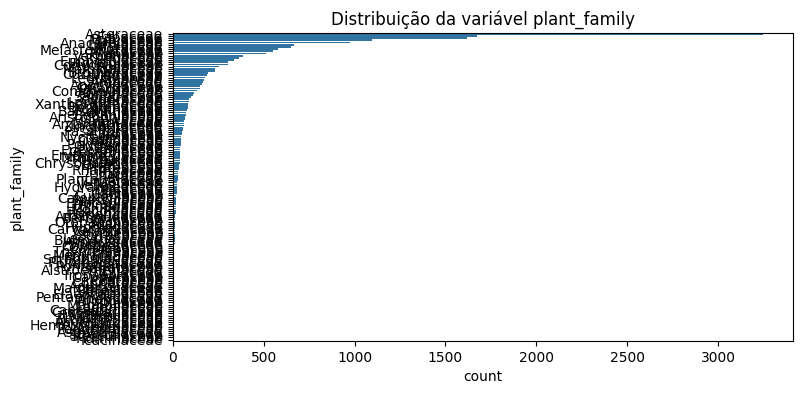

plant_genera: 680 categorias


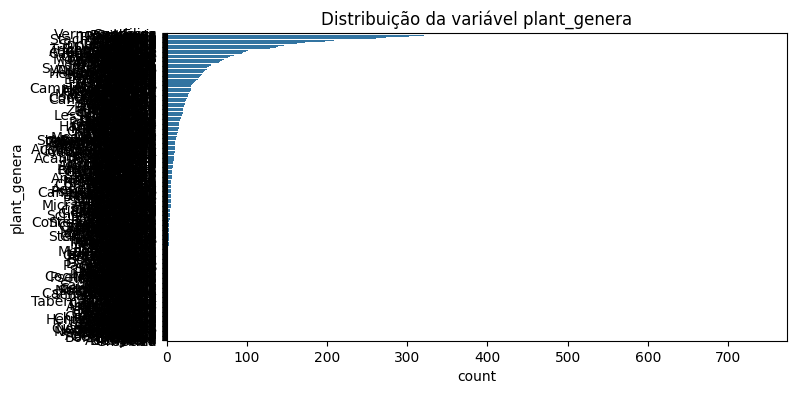

plant_species_complete_name: 1596 categorias


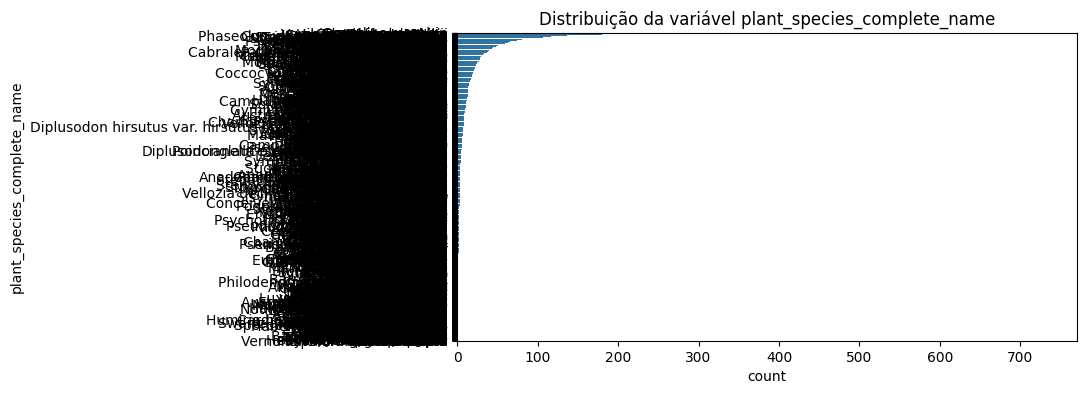

plant_type: 24 categorias


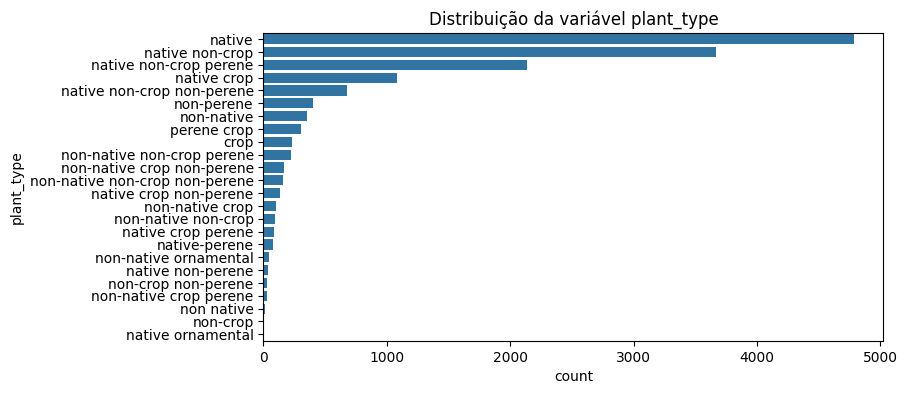

plant_habit: 19 categorias


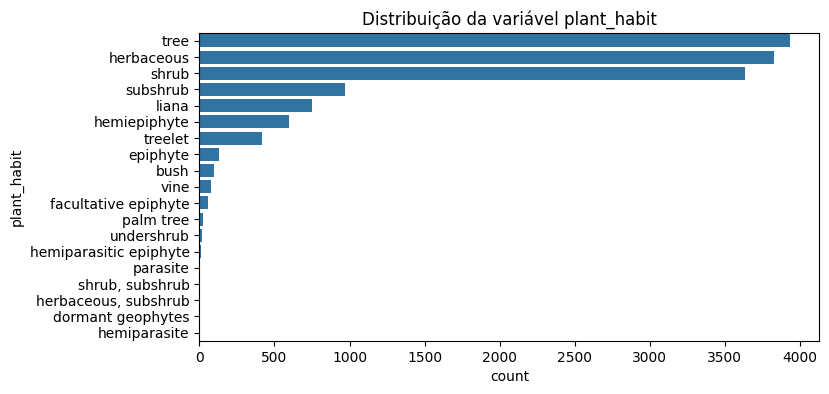

plant_flower_colour: 105 categorias


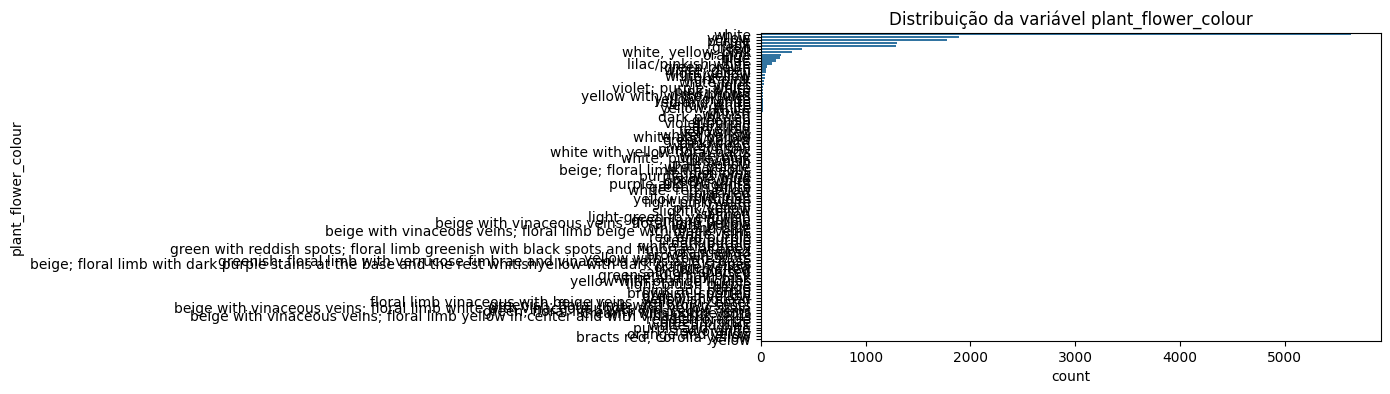

plant_flower_shape: 43 categorias


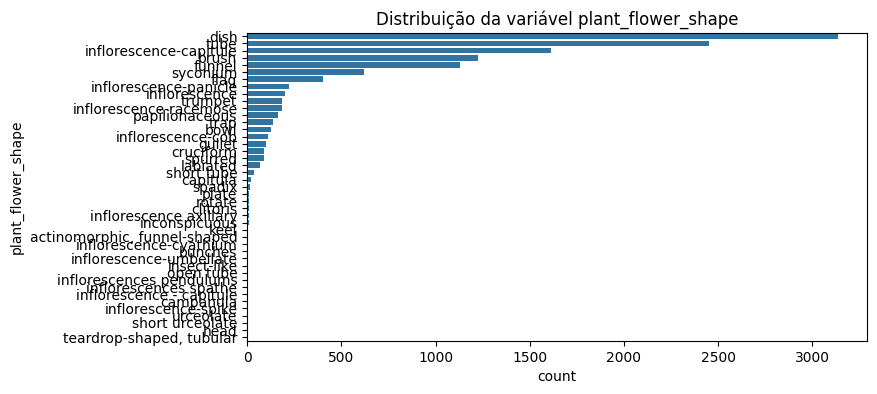

invertebrate_order: 11 categorias


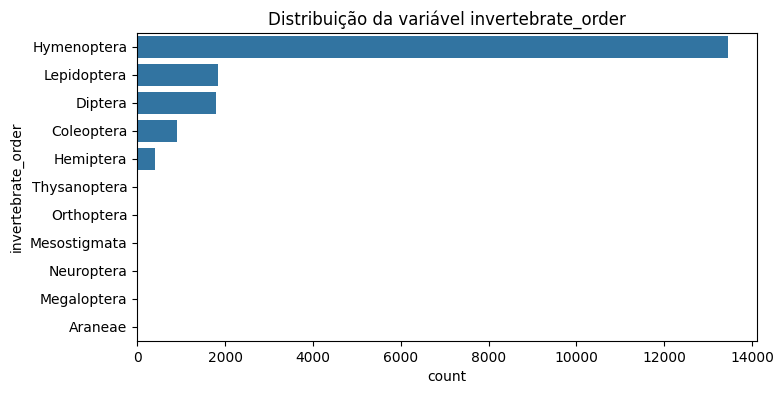

invertebrate_family: 136 categorias


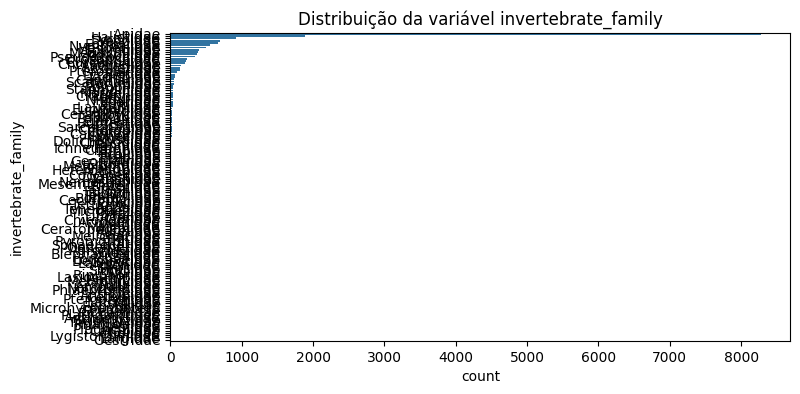

invertebrate_genera: 626 categorias


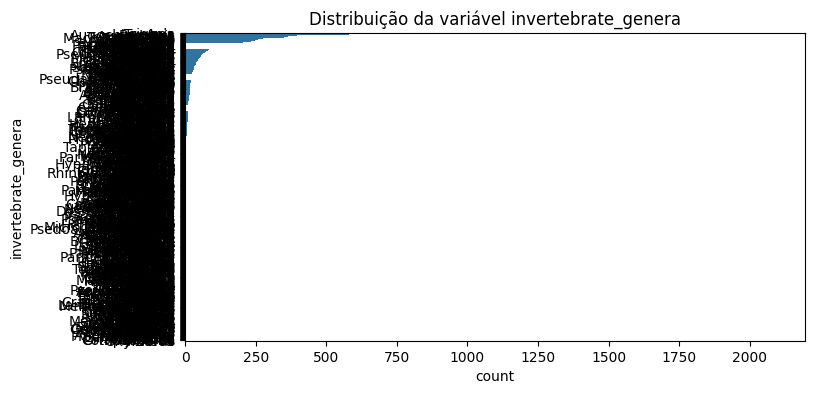

invertebrate_species_complete_name: 2542 categorias


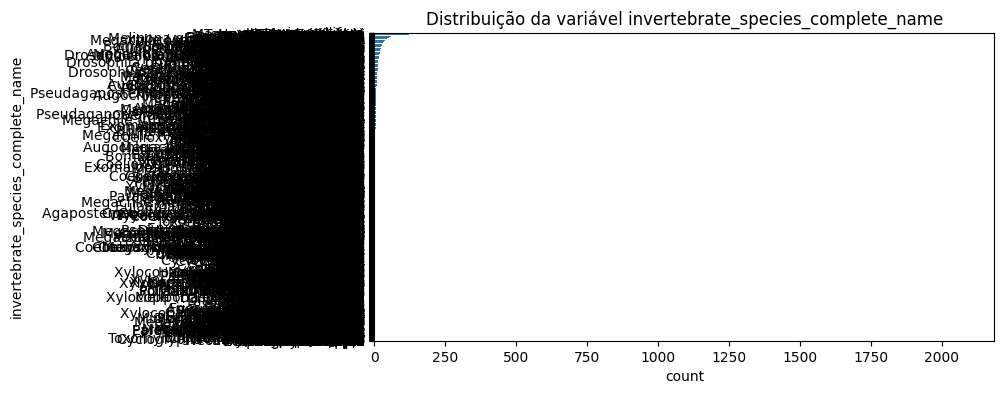

invertebrate_origins: 2 categorias


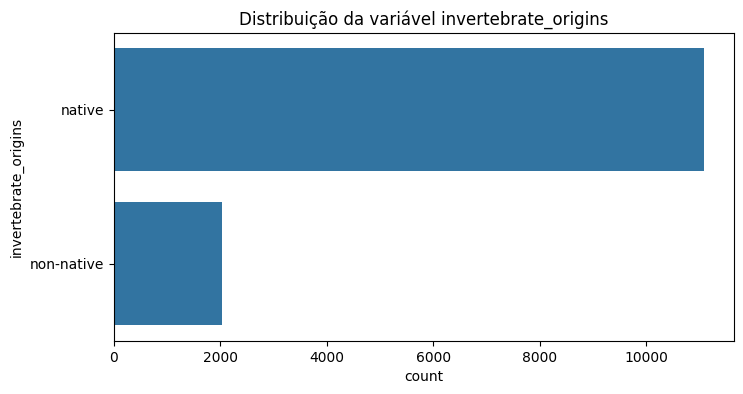

invertebrate_behavior: 36 categorias


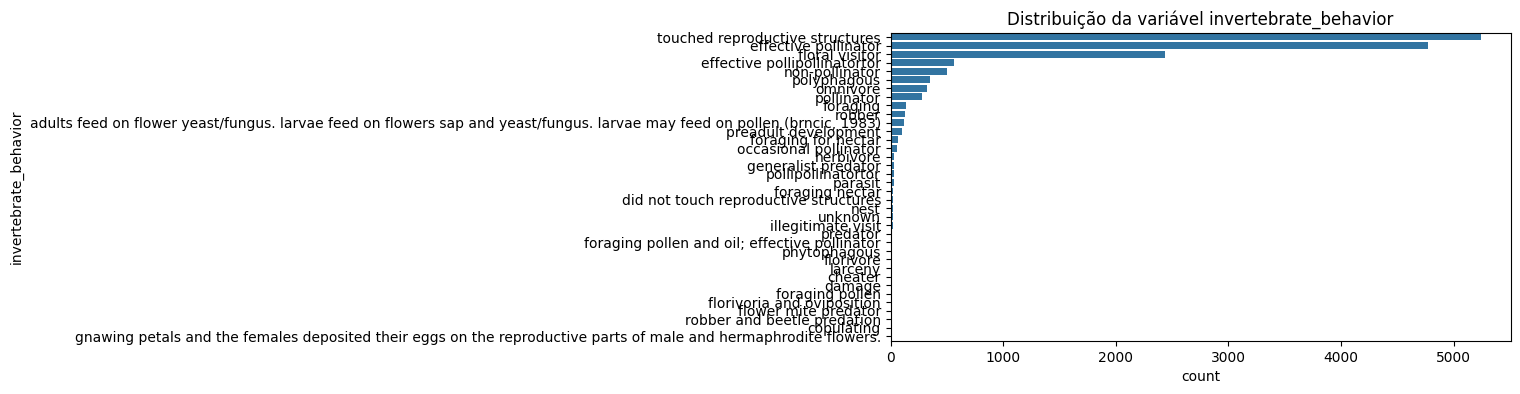

invertebrate_collector_structure: 25 categorias


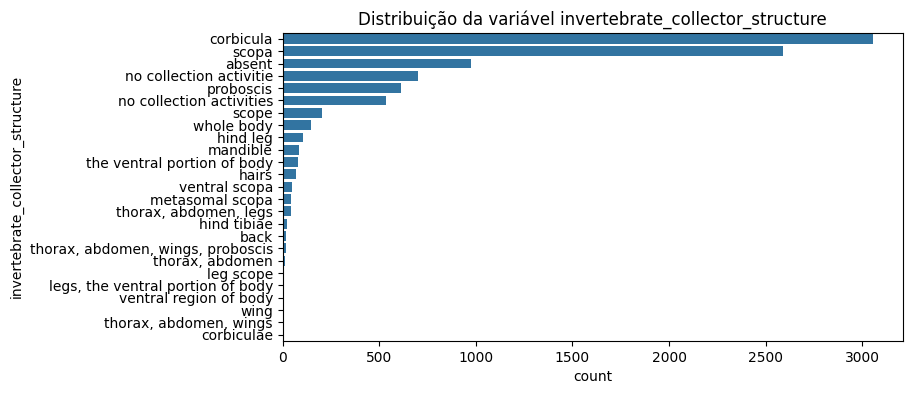

plant_collected_material: 25 categorias


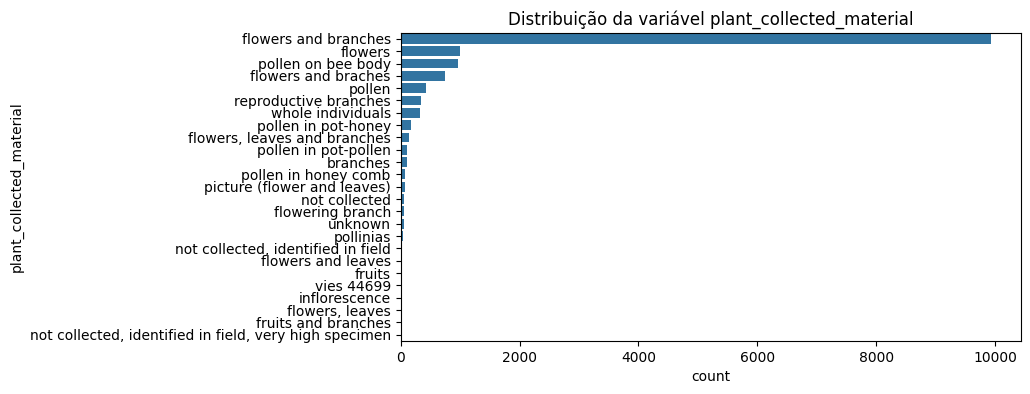

invertebrate_collected: 7 categorias


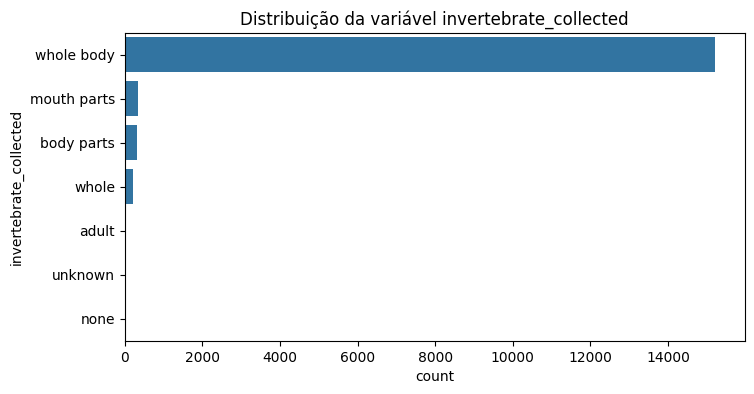

In [9]:
# Gráficos de contagem e análise de quantidade de categorias para variáveis categóricas
colunas_categoricas = df.select_dtypes(include='object').columns

for coluna in colunas_categoricas:
    print(f'{coluna}: {df[coluna].nunique()} categorias')
    plt.figure(figsize=(8, 4))
    sns.countplot(y=coluna, data=df, order=df[coluna].value_counts().index)
    plt.title(f'Distribuição da variável {coluna}')
    plt.show()

##### 1.2) Identificação de colunas que precisam de padronização

In [10]:
for coluna in df.columns:
    print(f"\nColuna: {coluna}")
    print(df[coluna].astype(str).value_counts(dropna=False).head(10))


Coluna: municipality
municipality
Antonina         2252
Joao Pessoa      1199
Araras            966
Florianopolis     805
Mucuge            791
Ibicoara          671
Viamao            573
Atibaia           520
Porto Alegre      414
Ancud             372
Name: count, dtype: int64

Coluna: state
state
Sao Paulo            6512
Bahia                3565
Parana               2278
Santa Catarina       1388
Paraiba              1272
Rio Grande do Sul    1228
Minas Gerais          803
Los Lagos             372
Ceara                 320
Espirito Santo        267
Name: count, dtype: int64

Coluna: country
country
Brazil       17985
Chile          372
Argentina       65
Name: count, dtype: int64

Coluna: veg_landuse_type_point_level1
veg_landuse_type_point_level1
forest         8087
pasture        2756
agriculture    1270
savanna        1226
orchard         928
grassland       917
nan             653
urban           509
fields          477
restinga        468
Name: count, dtype: int64

Coluna: 

> Colunas temperature e relative_humidity: apresentam intervalos como "20-25" > transformar em valor médio.

##### 1.3) Formatação de cada coluna coletada

In [11]:
def converter_intervalo(valor):
    if isinstance(valor, str) and '-' in valor:
        try:
            v_min, v_max = map(float, valor.split('-'))
            return (v_min + v_max) / 2
        except:
            return np.nan
    try:
        return float(valor)
    except:
        return np.nan

df['temperature'] = df['temperature'].apply(converter_intervalo)
df['relative_humidity'] = df['relative_humidity'].apply(converter_intervalo)


##### 1.4) Transformação das colunas no formato numérico
Objetivo: transformar todas as colunas categórics no formato numérico

In [12]:
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col].astype(str))

#### 2) Análise e escolha dos atributos

Agora, você precisa analisar cada atributo para verificar quais possuem informação relevantes para classificar a coluna alvo.

Utilize as técnicas de visualização e análise de dados vistas em aula para realizar esse processo.

Ao final da análise, você deve escolher os atributos que considerou mais relevantes com base na análise realizada (JUSTIFIQUE A ESCOLHA DE CADA COLUNA)

In [13]:
# Insira seu código aqui.
# Você pode criar células de código adicionais

# TODO
# 1) Visualização dos dados
# 2) Análise sobre possiveis relação encontradas
# 3) Escolha das colunas mais relevântes com justificativa

##### 2.1) Visualização dos dados

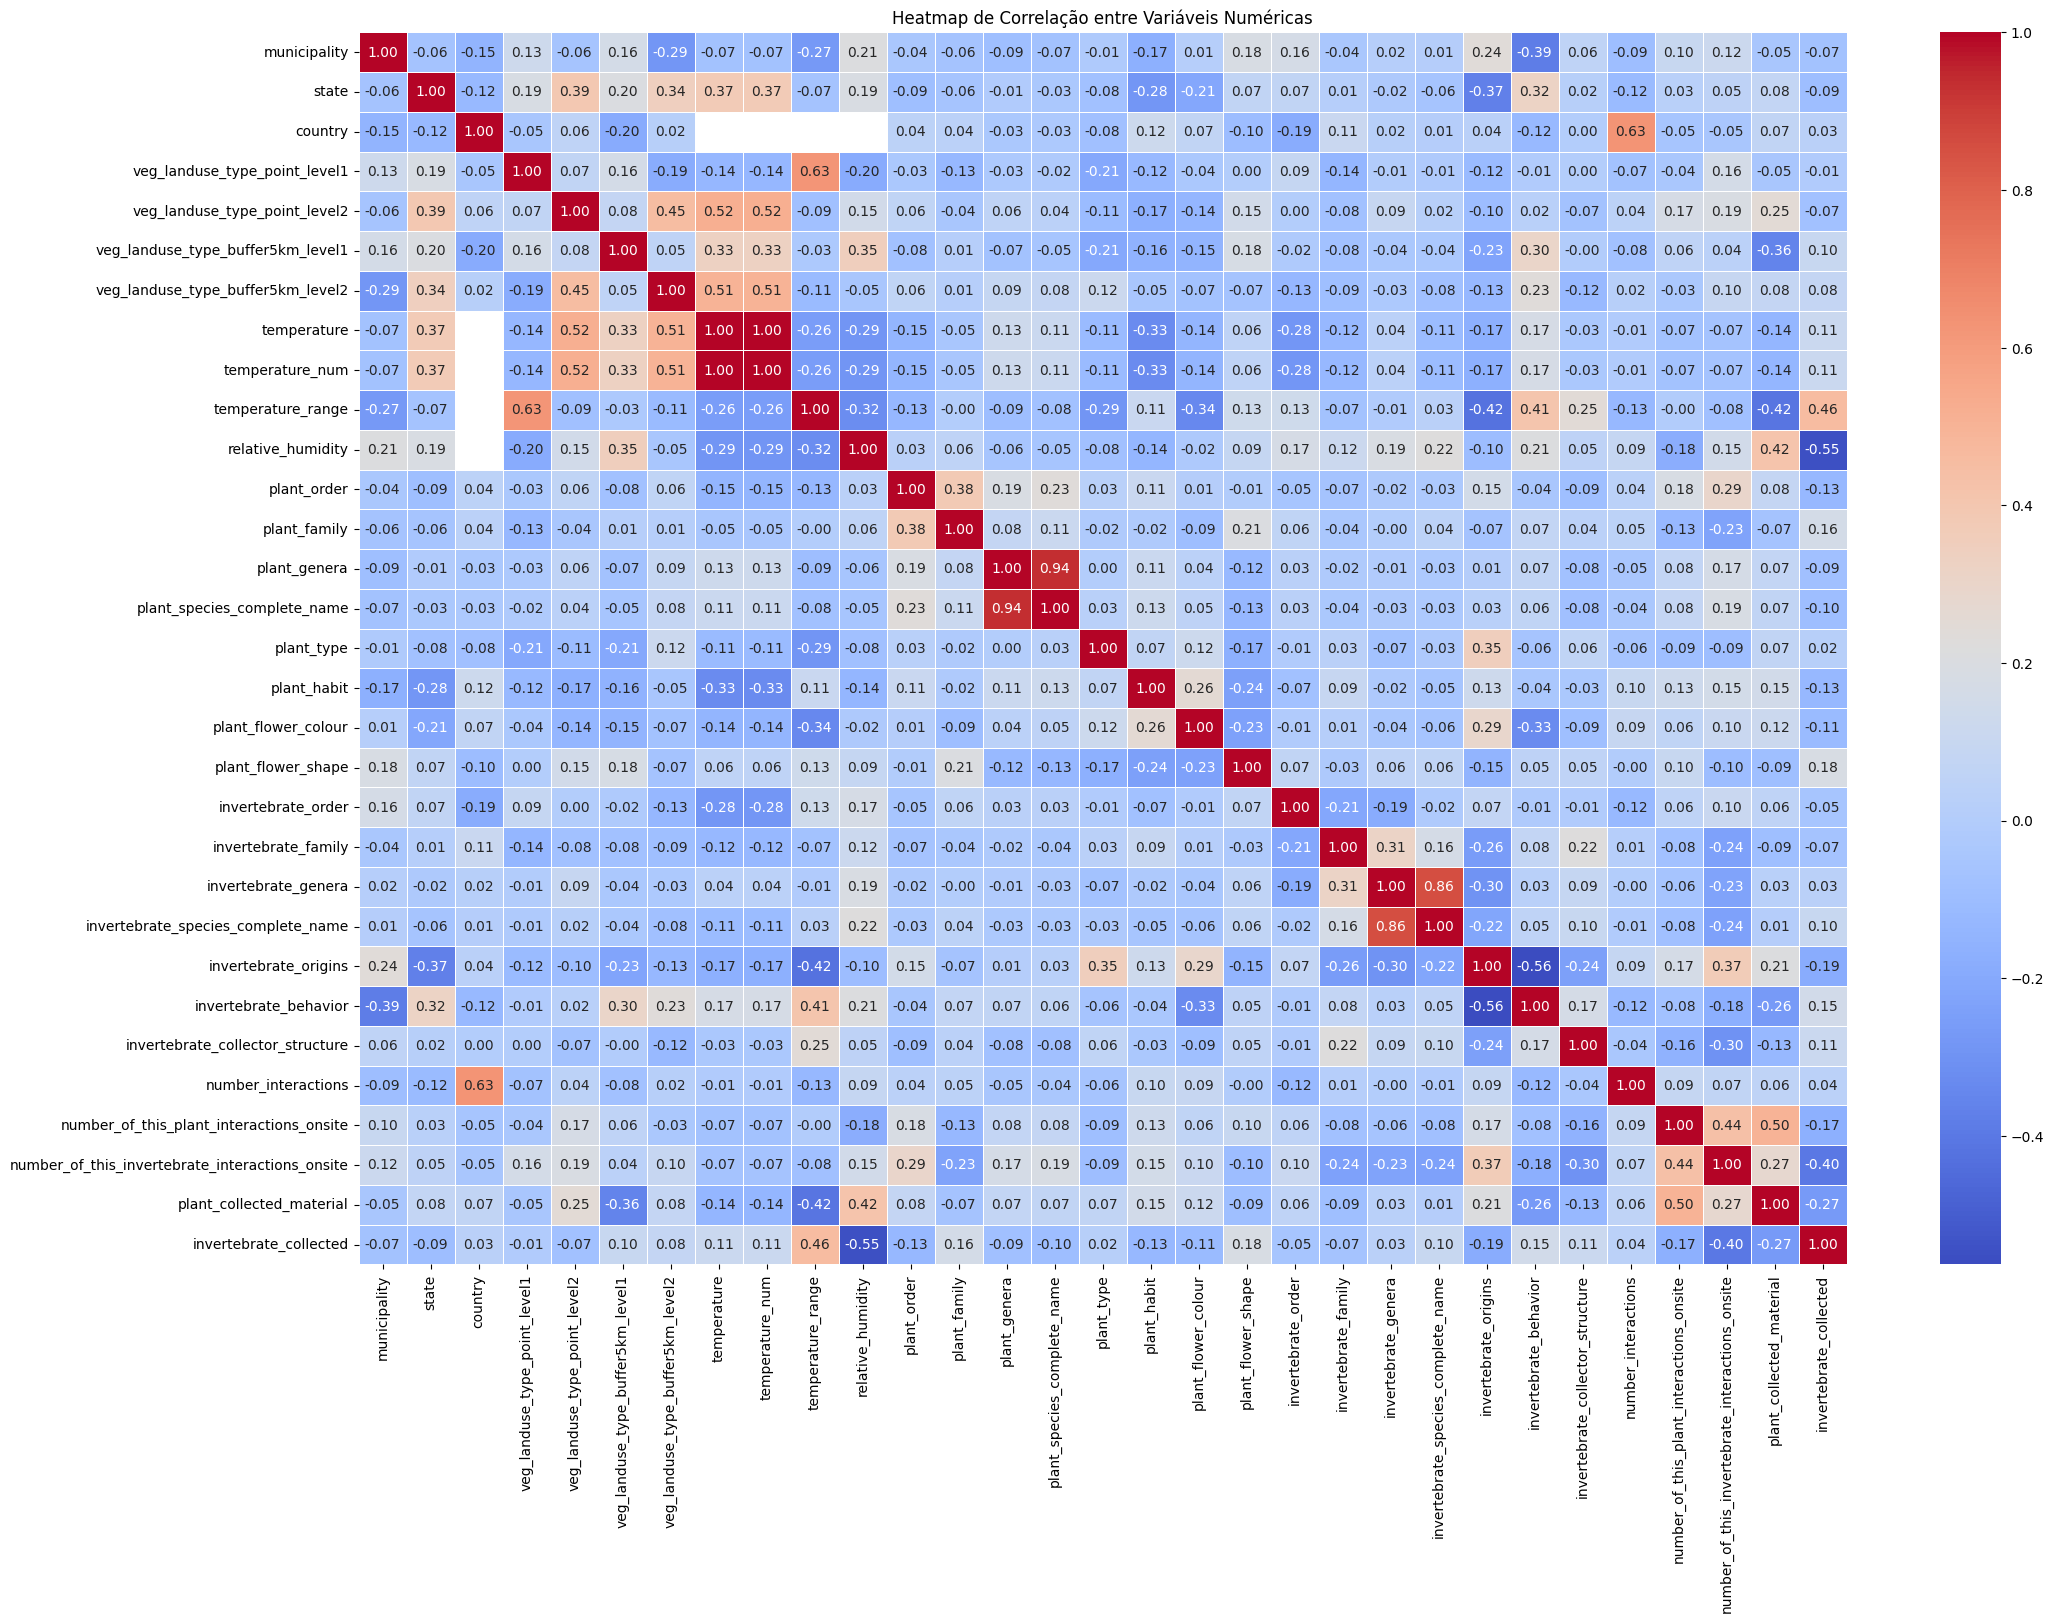

In [14]:
# Selecionando colunas numéricas
colunas_numericas = df.select_dtypes(include=['int64', 'float64']).columns

# Calculando a matriz de correlação
correlacoes = df[colunas_numericas].corr()

# Exibindo o heatmap
plt.figure(figsize=(24, 16))
sns.heatmap(correlacoes, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap de Correlação entre Variáveis Numéricas")
plt.show()

##### 2.2) Análise sobre possiveis relação encontradas

> Foram identificadas variáveis com potencial de relevância para a tarefa de classificação, como invertebrate_behavior, plant_flower_colour e temperature_range, com correlação significativa com a variável-alvo invertebrate_origins.

##### 2.3) Escolha das colunas mais relevantes com justificativa

> Com base na análise de correlação, foram selecionados os atributos com maior potencial preditivo para a coluna alvo invertebrate_origins.
> As seguintes variáveis se destacaram:
>
> - invertebrate_behavior: correlação negativa moderada (-0.56);
> - plant_flower_colour: correlação negativa (-0.43);
> - temperature_range: relação ecológica evidente;
> - plant_flower_shape e invertebrate_order: correlação média (-0.3 a -0.4);
> - relative_humidity e temperature: contextualização ambiental da interação.

#### 3) Preenchimento de dados faltantes

Após a formatação e seleção das colunas relevantes, você deve garantir que todas as colunas estejam com dados válidos em cada coluna.

Para isso, você deve preencher os dados faltantes das colunas usando o algoritmo de agrupamento K-means.

Os passos desse processo são:

Passo 1: Crie um segundo dataset (dataset 2) sem as colunas com dados faltantes.

![Passo1](https://drive.google.com/uc?export=download&id=1dBpwbuWW-I_6_paIQNlfGER2ZZinZ59R)


Passo 2: Aplique o K-means no dataset 2 para gerar clusters de tuplas com características semelhantes.

![Passo2](https://drive.google.com/uc?export=download&id=1mNPNPdecWCqMraoS57a6TQKjkhGDgUHU)

Passo 3: Para cada cluster, selecione as tuplas que não possuam dados faltantes.

![Passo3](https://drive.google.com/uc?export=download&id=1xLwkPSjjxuZpW2zzk0k_-w3-AmvN84gj)

Passo 4: Para as tuplas selecionadas, calcula o atributo estatístico mais adequado para a coluna (média, mediana, moda, etc).

![Passo4](https://drive.google.com/uc?export=download&id=1zt35CNY_CWSGX_igHsA_AWKNZl34TM8K)

Passo 5: Para cada tupla com dados faltantes, utilize o atributo estatístico referente ao seu grupo para preencher o dado da coluna.

![Passo5](https://drive.google.com/uc?export=download&id=1rEvU-6eaQURjzIrblpIiA7b-FFYj_bRD)


In [15]:
# Insira seu código aqui
# Você pode adicionar células adicionais

# TODO
# 1) Gerar o dataset sem as colunas com dados faltantes
# 2) Aplicar o K-means no novo dataset (explorando o melhor valor de K)
# 3) Cálcular um atributo estatístico (média, moda, mediana, etc), no dataset original, das colunas com dados faltantes
# 4) Preencher os valores das linhas com dados faltantes com o atributo estatístico referente ao seu grupo do K-means

##### 3.1) Gerar o dataset sem as colunas com dados faltantes

In [16]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


def preencher_faltantes_com_kmeans(df, coluna_alvo, k=3, metodo='mean'):
    df_copy = df.copy()

    # Identificando tuplas com valor faltante na coluna alvo
    ids_faltantes = df_copy[df_copy[coluna_alvo].isnull()].index

    if len(ids_faltantes) == 0:
        print(f"[{coluna_alvo}] Nenhum valor faltante encontrado.")
        return df_copy

    print(f"[{coluna_alvo}] Encontradas {len(ids_faltantes)} tuplas com dados faltantes.")

    # Criando dataset2 removendo a coluna alvo e filtrando apenas tuplas completas
    df2 = df_copy.drop(columns=[coluna_alvo]).dropna()

    if df2.empty:
        print(f"[{coluna_alvo}] Não há tuplas suficientes para gerar clusters. Pulando preenchimento.")
        return df_copy

    # Padronizando os dados
    scaler = StandardScaler()
    X_padronizado = scaler.fit_transform(df2)

    # Aplicando KMeans
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    df2['cluster'] = kmeans.fit_predict(X_padronizado)

    # Selecionando as tuplas com valores faltantes que sejam completas nas demais colunas
    df_missing = df_copy.loc[ids_faltantes].drop(columns=[coluna_alvo]).dropna()

    if df_missing.empty:
        print(f"[{coluna_alvo}] As tuplas com dados faltantes também contêm outros NaNs. Pulando preenchimento.")
        return df_copy

    X_missing = scaler.transform(df_missing)
    clusters_missing = kmeans.predict(X_missing)

    # Preenchendo os valores faltantes com estatística do cluster
    for idx, cluster_id in zip(df_missing.index, clusters_missing):
        dados_cluster = df2[df2['cluster'] == cluster_id]
        
        if metodo == 'mean':
            valor_preenchido = df_copy.loc[dados_cluster.index, coluna_alvo].mean()
        elif metodo == 'median':
            valor_preenchido = df_copy.loc[dados_cluster.index, coluna_alvo].median()
        elif metodo == 'mode':
            valor_preenchido = df_copy.loc[dados_cluster.index, coluna_alvo].mode()[0]
        else:
            raise ValueError("Método inválido. Use 'mean', 'median' ou 'mode'.")

        df_copy.at[idx, coluna_alvo] = valor_preenchido

    print(f"[{coluna_alvo}] Preenchimento finalizado com sucesso.")
    return df_copy

In [17]:
df = preencher_faltantes_com_kmeans(df, 'temperature', k=3, metodo='mean')
df = preencher_faltantes_com_kmeans(df, 'relative_humidity', k=3, metodo='mean')

[temperature] Encontradas 12593 tuplas com dados faltantes.
[temperature] As tuplas com dados faltantes também contêm outros NaNs. Pulando preenchimento.
[relative_humidity] Encontradas 16593 tuplas com dados faltantes.
[relative_humidity] Preenchimento finalizado com sucesso.


In [18]:
# Como o K-means não conseguiu preencher temperature, aplicamos a mediana global
df['temperature'] = df['temperature'].fillna(df['temperature'].median())

In [19]:
df.isnull().sum()

municipality                                           0
state                                                  0
country                                                0
veg_landuse_type_point_level1                          0
veg_landuse_type_point_level2                          0
veg_landuse_type_buffer5km_level1                      0
veg_landuse_type_buffer5km_level2                      0
temperature                                            0
temperature_num                                    12593
temperature_range                                  12593
relative_humidity                                  16049
plant_order                                            0
plant_family                                           0
plant_genera                                           0
plant_species_complete_name                            0
plant_type                                             0
plant_habit                                            0
plant_flower_colour            

In [20]:
# Removendo as colunas 'temperature_num' e 'temperature_range' do DataFrame df
df.drop(columns=['temperature_num', 'temperature_range'], inplace=True)

> Objetivo: Prevenir ruído pois, povavelmente são colunas derivadas coluna 'temperature' já tratada.

In [21]:
# Preenchendo as colunas de contagem de interações
colunas_para_preencher = [
    'number_interactions',
    'number_of_this_plant_interactions_onsite',
    'number_of_this_invertebrate_interactions_onsite'
]

for col in colunas_para_preencher:
    df = preencher_faltantes_com_kmeans(df, col, k=3, metodo='median')

[number_interactions] Encontradas 1236 tuplas com dados faltantes.
[number_interactions] As tuplas com dados faltantes também contêm outros NaNs. Pulando preenchimento.
[number_of_this_plant_interactions_onsite] Encontradas 9096 tuplas com dados faltantes.
[number_of_this_plant_interactions_onsite] Preenchimento finalizado com sucesso.
[number_of_this_invertebrate_interactions_onsite] Encontradas 9235 tuplas com dados faltantes.
[number_of_this_invertebrate_interactions_onsite] Preenchimento finalizado com sucesso.


In [22]:
# Removendo as colunas number_interactions, temperature_number_of_this_plant_interactions_onsite e number_of_this_invertebrate_interactions_onsite
df.drop(columns=[
    'number_of_this_plant_interactions_onsite',
    'number_of_this_invertebrate_interactions_onsite'
], inplace=True)

> Objetivo: não pôde ser preenchida, pois suas tuplas faltantes também apresentavam NaNs em outros atributos, impossibilitando o agrupamento. Além disso, essas variáveis apresentaram baixa correlação com a coluna alvo.

In [ ]:
# Chacagem
df.isnull().sum()

municipality                              0
state                                     0
country                                   0
veg_landuse_type_point_level1             0
veg_landuse_type_point_level2             0
veg_landuse_type_buffer5km_level1         0
veg_landuse_type_buffer5km_level2         0
temperature                               0
relative_humidity                     16049
plant_order                               0
plant_family                              0
plant_genera                              0
plant_species_complete_name               0
plant_type                                0
plant_habit                               0
plant_flower_colour                       0
plant_flower_shape                        0
invertebrate_order                        0
invertebrate_family                       0
invertebrate_genera                       0
invertebrate_species_complete_name        0
invertebrate_origins                      0
invertebrate_behavior           

In [25]:
# Preenchendo relative_humidity com mediana global (K-means falhou)
df['relative_humidity'] = df['relative_humidity'].fillna(df['relative_humidity'].median())

In [26]:
# Removendo number_interactions (não foi preenchida e é irrelevante)
df.drop(columns=['number_interactions'], inplace=True)

In [27]:
# Checagem final: deve retornar 0
print("Total de valores faltantes:", df.isnull().sum().sum())

Total de valores faltantes: 0


In [30]:
# Salvando dataset tratado
df.to_csv("../data/processed/dataset_fase1_tratado.csv", index=False)

#### 4) Escala dos atributos

Por fim, você precisa reescalar os dados, para que os algoritmos consigam aprender as relações entre os dados sem muito ruído e melhora a classificação.

Lembre-se de verificar e tratar colunas com outliers.

In [24]:
# Insira seu código aqui
# Você pode adicionar células adicionais

# TODO
# 1) Verificar quais dados possuem outliers e tratar de acordo
# 2) Reescalar os dados

# Check-List

Com isso, você completa a fase 1 da disciplina. Para auxiliar você a verificar se o trabalho está adequado para a entrega, criamos uma lista de item que devem ser satisfeitos ao final do trabalho.

- Todas as colunas selecionadas possuem justificativa;
- Todas as colunas estão com a sua representação unificada;
- Todas as colunas estão no formato numérico;
- Todas as colunas estão com dados válidos (sem dados falantes);
- Todas as colunas estão reescaladas.
